[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [2]:
data = pd.read_csv("/content/athlete_events.csv")
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# ID
# رقم تعريفي فريد لكل رياضي
# Name
# اسم الرياضي
# Sex
# جنس الرياضي (M = ذكر، F = أنثى)
# Age
# عمر الرياضي عند مشاركته
# Height
# طول الرياضي (بالسنتمتر)
# Weight
# وزن الرياضي (بكيلوغرام)
# Team
# اسم الفريق / الدولة التي يمثلها الرياضي
# NOC
# رمز الدولة (ثلاثة أحرف)، مثلاً USA، IND، EGY
# Year
# السنة التي أقيمت فيها الألعاب الأولمبية
# Season
# موسم الألعاب الأولمبية (صيفي Summer أو شتوي Winter)
# City
# المدينة التي أقيمت فيها الألعاب
# Sport
# نوع الرياضة التي شارك بها الرياضي
# Event
# الحدث أو المنافسة التي شارك فيها الرياضي بالتحديد
# Medal
# ما إذا كان الرياضي حصل على ميدالية (Bronze, Silver, Gold، أو NaN إن لم يفز بشيء)

In [ ]:
# ما هو EDa؟
# تحليل البيانات الاستكشافي (EDA) هو عملية فهم البيانات، اكتشاف الأنماط، تحديد القيم الشاذة (Outliers)، وفحص العلاقات بين المتغيرات قبل بناء نموذج تعلم آلي.

# 2. هل نستخدم التصنيف (Classification) أم التوقع (Regression)؟
# التصنيف (Classification): نستخدمه عندما يكون المتغير المستهدف (Target Variable) قيمة فئوية (Categorical) .
# التوقع (Regression): نستخدمه عندما يكون المتغير المستهدف رقميًا (Numerical) .
#  أمثلة على مهام تصنيف (Classification) باستخدام هذا الملف:
#  مثال 1: هل سيفوز الرياضي بميدالية؟
# المتغير المستهدف: Medal (Bronze, Silver, Gold, أو لا شيء)
# الهدف: بناء نموذج لتصنيف ما إذا كان الرياضي سيحصل على ميدالية أم لا.
# الأعمدة المدخلة (Features): Age, Sex, Height, Weight, Sport, Team, Year...
# مثال 2: هل سيكون الفوز بالميدالية ذهبيًا؟
# المتغير المستهدف: هل Medal == 'Gold' (نعم/لا)
# ملاحظة: يمكن تحويل Medal إلى متغير ثنائي (Binary) مثل:
# 1 = حصل على ذهبية
# 0 = لم يحصل على ذهبية
#  مثال 3: تصنيف الجنس بناءً على العمر والطول والوزن
# المتغير المستهدف: Sex
# المدخلات: Age, Height, Weight
# الهدف: بناء نموذج يتنبأ بجنس الرياضي بناءً على خصائصه الجسدية.
#  أمثلة على مهام توقع (Regression)
#  مثال: توقع عمر الرياضي بناءً على الطول والوزن
# المتغير المستهدف: Age
# المدخلات: Height, Weight
# الهدف: بناء نموذج يتنبأ بعمر الرياضي.
#  خطوات EDa Before Classification or Prediction:
# تفقد البيانات:
# عدد الصفوف والأعمدة
# نوع البيانات في كل عمود (float, int, object)
# التحقق من القيم المفقودة (Missing Values)
# معالجة البيانات المفقودة:
# إما حذف الصفوف / الأعمدة ذات القيم المفقودة
# أو ملء القيم المفقودة (Imputation)
# تحويل البيانات:
# تحويل المتغيرات النصية (مثل Sex, Team, Sport) إلى قيم عددية باستخدام One-Hot Encoding أو Label Encoding
# التعامل مع Outliers (إن وجدت)
# تحليل العلاقات بين المتغيرات:
# استخدام الرسوم البيانية (Bar Chart, Box Plot, Scatter Plot)
# دراسة العلاقة بين العمر / الوزن / الطول وفوز الرياضي بميدالية
# اختيار النموذج المناسب:
# Logistic Regression, Decision Tree, Random Forest, SVM
# تقييم النموذج:
# دقة (Accuracy)
# Precision, Recall, F1-Score (خاصة في حالة عدم توازن الفئات)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# تحميل البيانات
df = pd.read_csv('athlete_events.csv')

# تنظيف البيانات
df = df.dropna(subset=['Medal', 'Age', 'Height', 'Weight'])

# تحويل Medal إلى متغير ثنائي
df['WonMedal'] = df['Medal'].apply(lambda x: 1 if pd.notnull(x) else 0)

# تحويل الجنس إلى قيم عددية
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})

# اختيار المدخلات والمخرجات
X = df[['Sex', 'Age', 'Height', 'Weight']]
y = df['WonMedal']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# تدريب نموذج
model = RandomForestClassifier()
model.fit(X_train, y_train)

# التقييم
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6037

    accuracy                           1.00      6037
   macro avg       1.00      1.00      1.00      6037
weighted avg       1.00      1.00      1.00      6037



In [4]:
# 3. تحليل القيم المفقودة (Missing Values)
# عرض عدد القيم المفقودة في كل عمود:

missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

Age         9474
Height     60171
Weight     62875
Medal     231333
dtype: int64


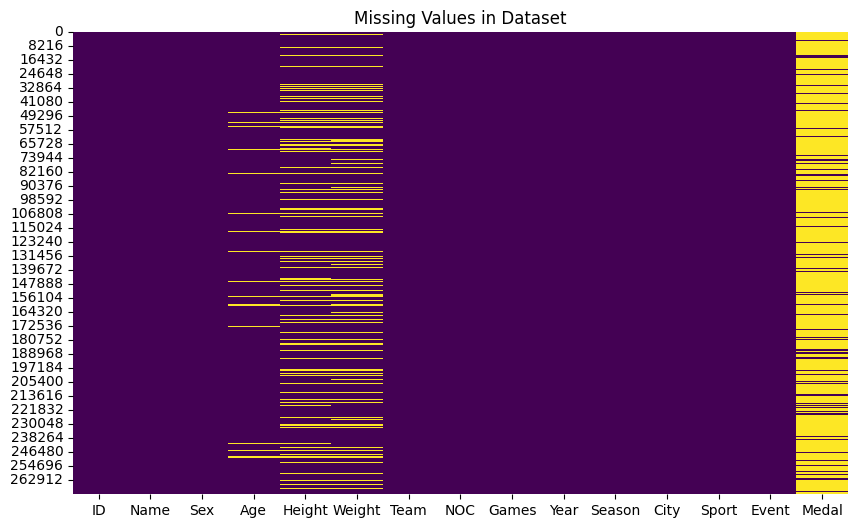

In [5]:
# رسم بياني يوضح النسبة المئوية للقيم المفقودة:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

In [27]:
# Unique Athletes, Teams, Sports, Events
print("Unique Athletes:", df['Name'].nunique())
print("Unique Teams:", df['Team'].nunique())
print("Unique Sports:", df['Sport'].nunique())
print("Unique Events:", df['Event'].nunique())

Unique Athletes: 20732
Unique Teams: 263
Unique Sports: 55
Unique Events: 562


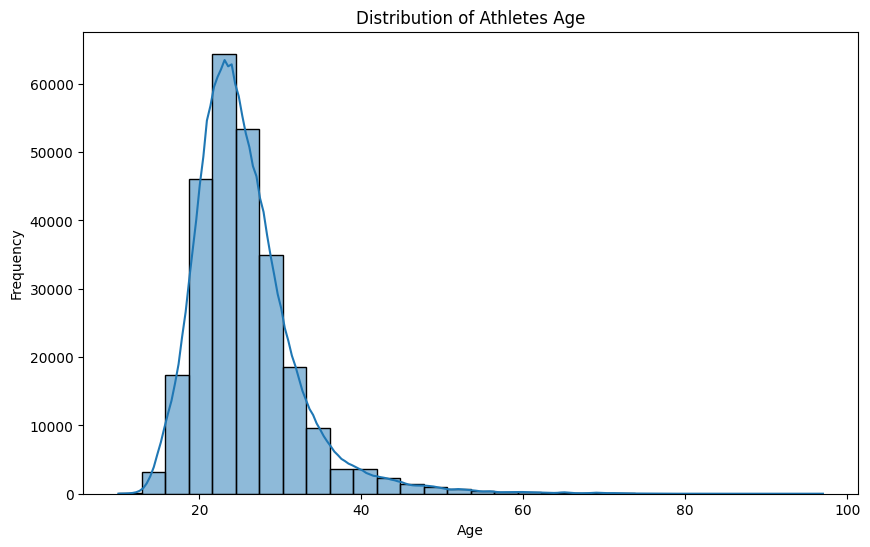

In [6]:
#  تحليل توزيع العمر (Age)
# رسم بياني لتوزيع العمر:

plt.figure(figsize=(10,6))
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Athletes Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-7-2437308130>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


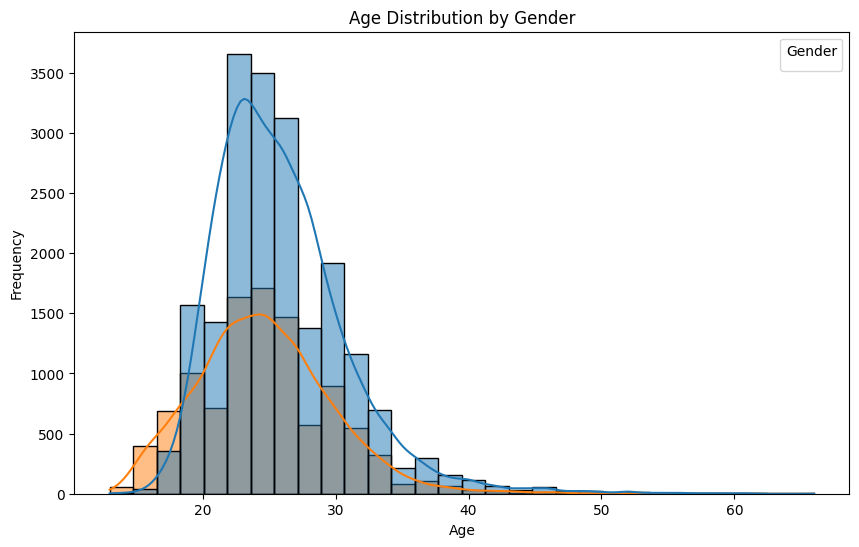

In [7]:
# توزيع العمر حسب الجنس:
plt.figure(figsize=(10,6))
sns.histplot(data=data.dropna(), x='Age', hue='Sex', bins=30, kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.show()

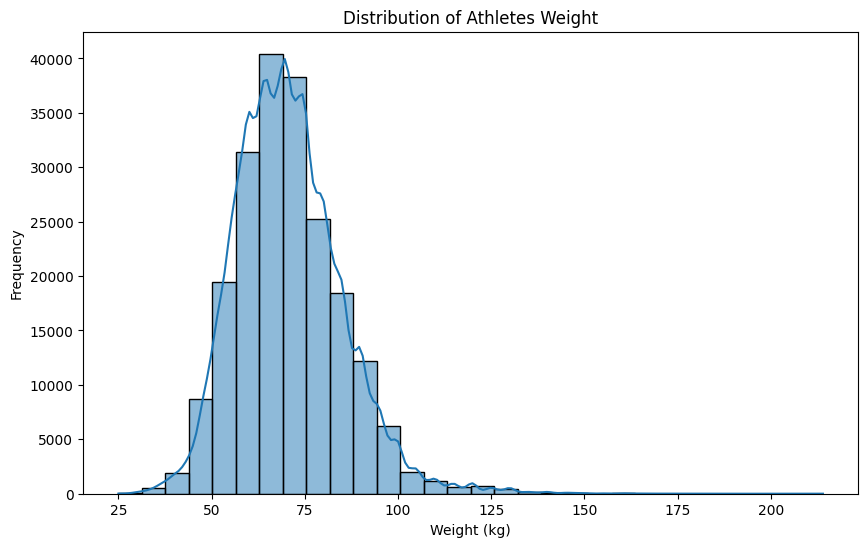

In [8]:
# 5. تحليل توزيع الوزن (Weight)
# رسم بياني لتوزيع الوزن:

plt.figure(figsize=(10,6))
sns.histplot(data['Weight'].dropna(), bins=30, kde=True)
plt.title('Distribution of Athletes Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-9-2496962449>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


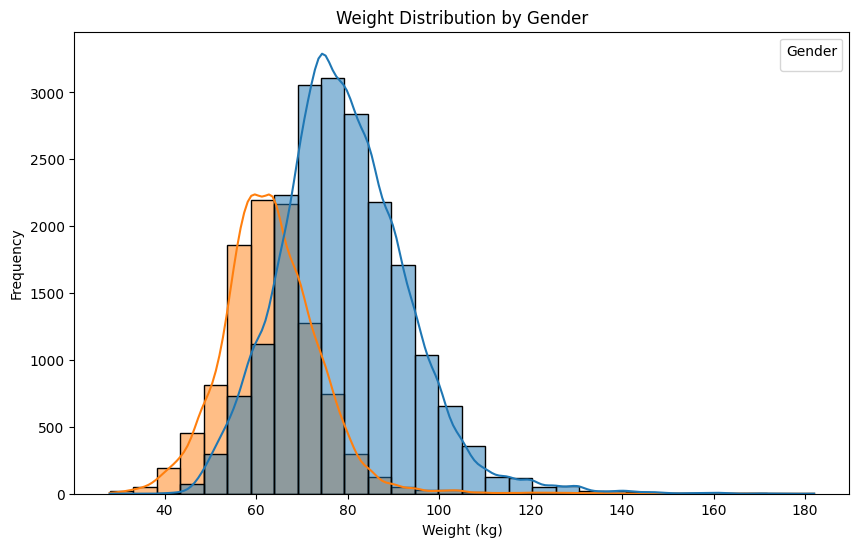

In [9]:
# توزيع الوزن حسب الجنس:
plt.figure(figsize=(10,6))
sns.histplot(data=data.dropna(), x='Weight', hue='Sex', bins=30, kde=True)
plt.title('Weight Distribution by Gender')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.show()

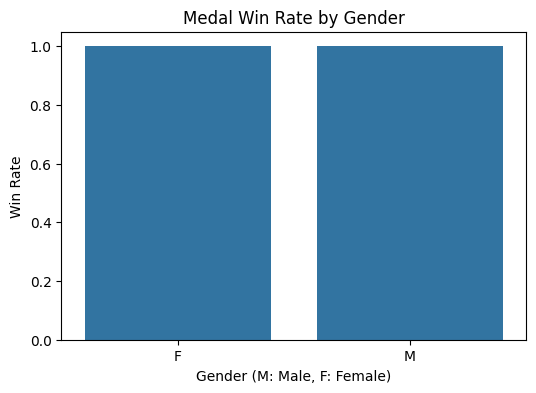

In [10]:
# تحليل فوز الرياضيين حسب الجنس
# نسبة الفوز بالميداليات حسب الجنس:
# إضافة عمود جديد: هل حصل على ميدالية أم لا؟
data['WonMedal'] = df['Medal'].notnull()

gender_medal = data.groupby('Sex')['WonMedal'].mean().reset_index()
gender_medal.columns = ['Gender', 'Win Rate']

plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Win Rate', data=gender_medal)
plt.title('Medal Win Rate by Gender')
plt.ylabel('Win Rate')
plt.xlabel('Gender (M: Male, F: Female)')
plt.show()

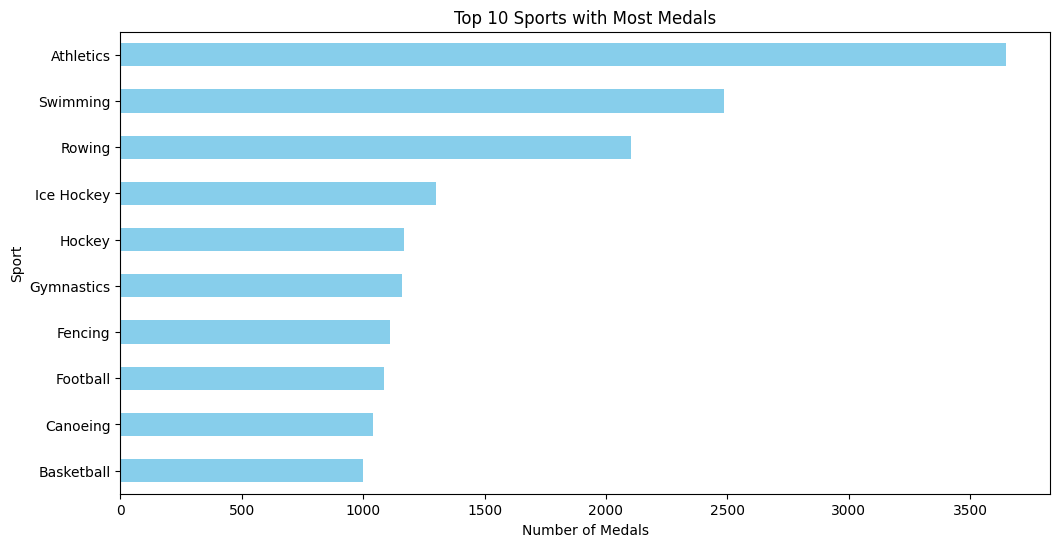

In [11]:
# تحليل فوز الرياضيين حسب الرياضة (Top Sports with Medals)
# أعلى الرياضات التي يُفوز فيها بميداليات
top_sports = data[data['WonMedal'] == True]['Sport'].value_counts().head(10)

plt.figure(figsize=(12,6))
top_sports.plot(kind='barh', color='skyblue')
plt.title('Top 10 Sports with Most Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.gca().invert_yaxis()  # to show the highest at the top
plt.show()

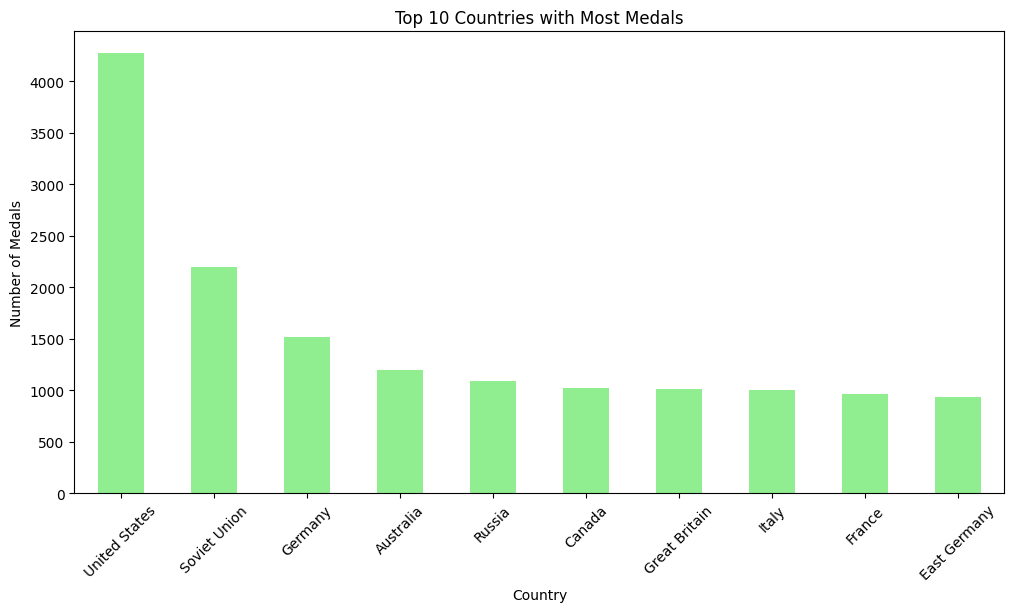

In [12]:
# تحليل فوز الرياضيين حسب الدولة (Top Countries with Medals)
# أعلى الدول فوزًا بالميداليات:

top_countries = data[data['WonMedal'] == True]['Team'].value_counts().head(10)

plt.figure(figsize=(12,6))
top_countries.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries with Most Medals')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()

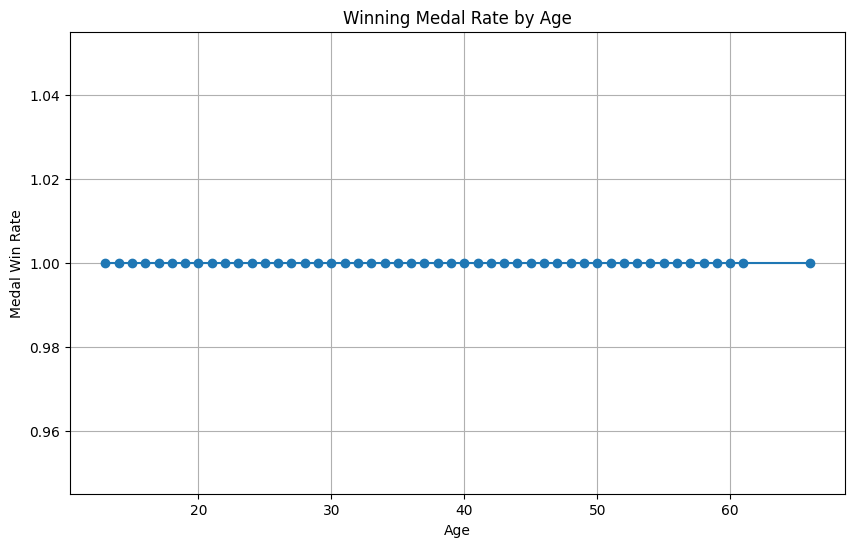

In [13]:
# تحليل تأثير العمر على احتمال الفوز بالميدالية
age_medal = data.groupby('Age')['WonMedal'].mean().dropna()

plt.figure(figsize=(10,6))
age_medal.plot(kind='line', marker='o')
plt.title('Winning Medal Rate by Age')
plt.xlabel('Age')
plt.ylabel('Medal Win Rate')
plt.grid(True)
plt.show()

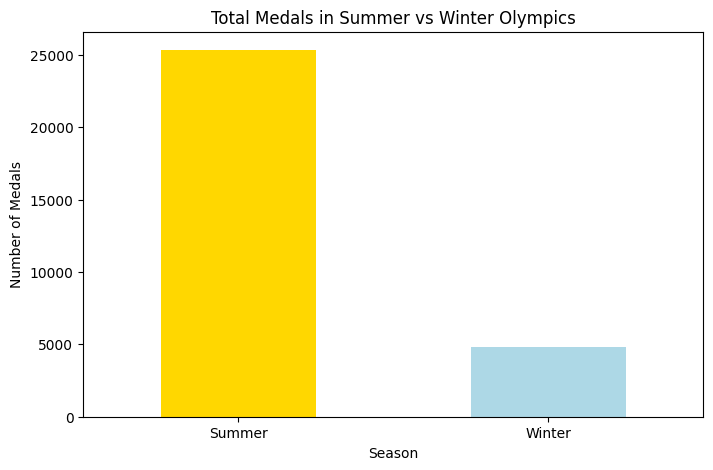

In [14]:
#تحليل الميداليات حسب الموسم (Summer vs Winter)
medals_by_season = data[data['WonMedal'] == 1].groupby('Season').size()

plt.figure(figsize=(8,5))
medals_by_season.plot(kind='bar', color=['gold', 'lightblue'])
plt.title('Total Medals in Summer vs Winter Olympics')
plt.xlabel('Season')
plt.ylabel('Number of Medals')
plt.xticks(rotation=0)
plt.show()

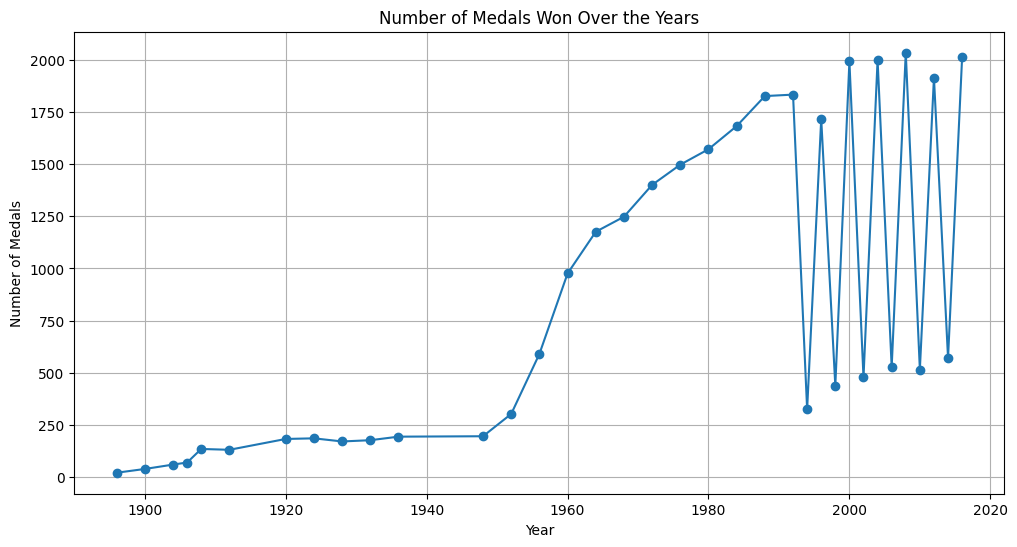

In [15]:
#تطور الأداء حسب السنة (عدد الميداليات بمرور السنين)
medals_by_year = data[data['WonMedal'] == 1].groupby('Year').size()

plt.figure(figsize=(12,6))
medals_by_year.plot(kind='line', marker='o')
plt.title('Number of Medals Won Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()

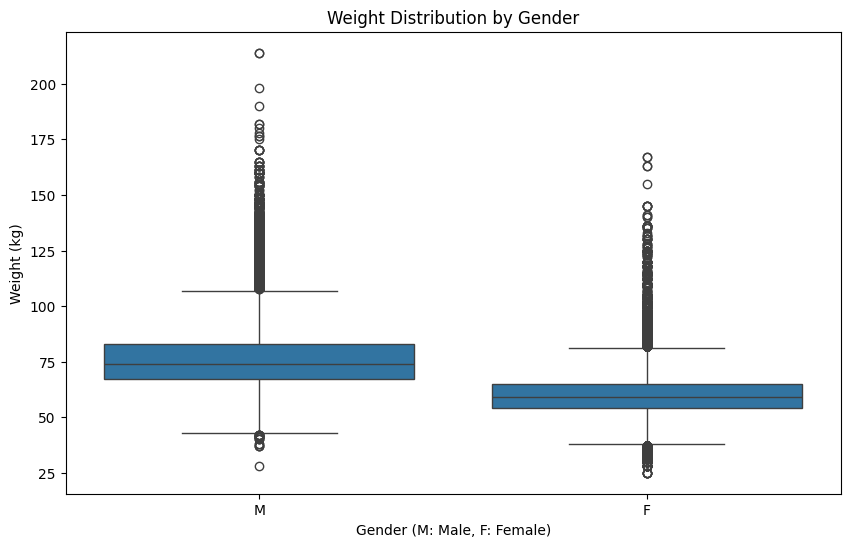

In [16]:
#توزيع الوزن حسب الجنس:
plt.figure(figsize=(10,6))
sns.boxplot(x='Sex', y='Weight', data=data)
plt.title('Weight Distribution by Gender')
plt.xlabel('Gender (M: Male, F: Female)')
plt.ylabel('Weight (kg)')
plt.show()

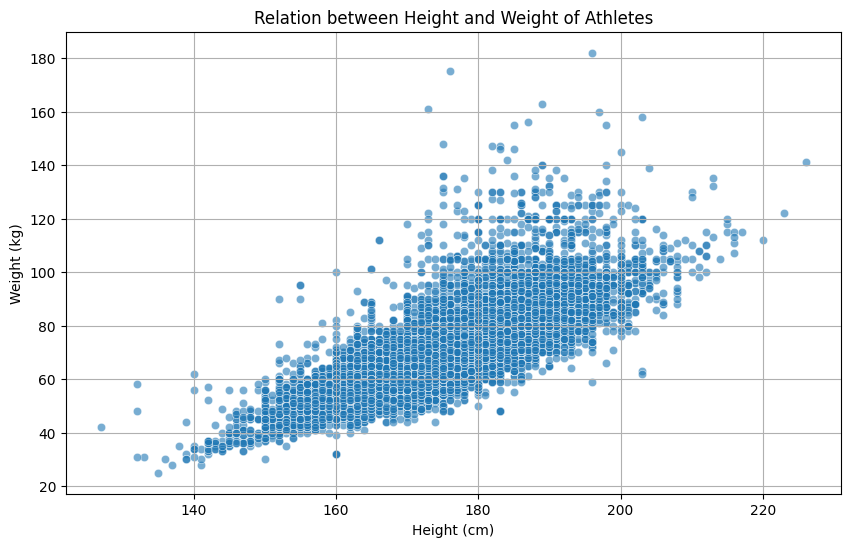

In [17]:
# تحليل العلاقة بين الطول والوزن
# رسم بياني يوضح العلاقة بين الطول والوزن:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Height', y='Weight', data=data.sample(frac=0.1, random_state=42), alpha=0.6)
plt.title('Relation between Height and Weight of Athletes')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

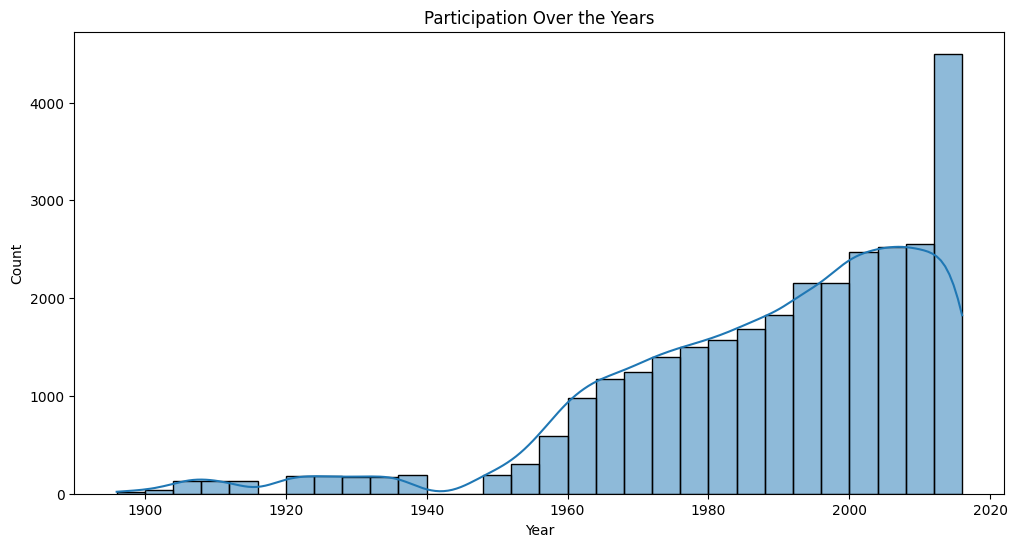

In [28]:
# Distribution of Participation Over Years
plt.figure(figsize=(12,6))
sns.histplot(df['Year'], bins=30, kde=True)
plt.title("Participation Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

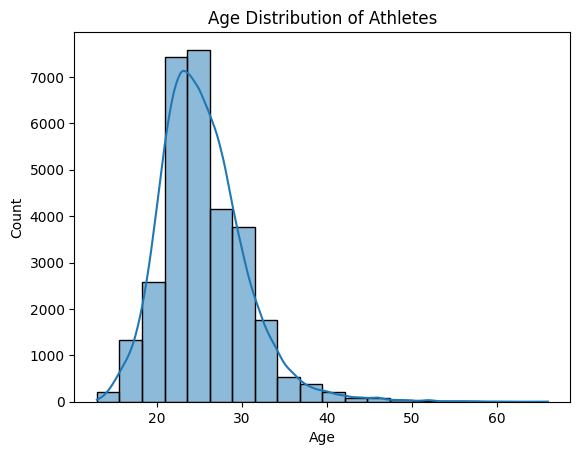

In [29]:
# Age Distribution
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title("Age Distribution of Athletes")
plt.show()

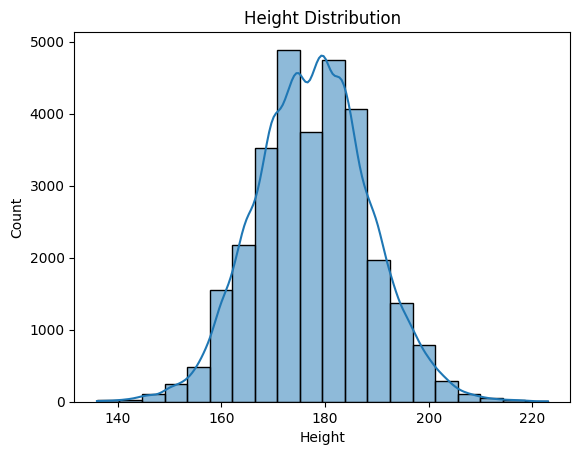

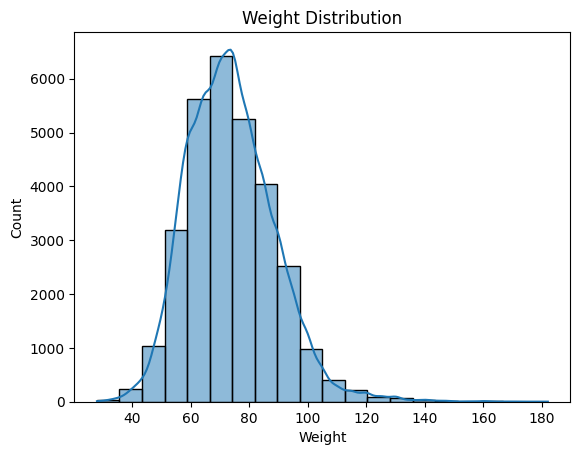

In [30]:
#Height & Weight Distributions
sns.histplot(df['Height'].dropna(), bins=20, kde=True)
plt.title("Height Distribution")
plt.show()

sns.histplot(df['Weight'].dropna(), bins=20, kde=True)
plt.title("Weight Distribution")
plt.show()

Medal
Gold      10167
Bronze    10148
Silver     9866
Name: count, dtype: int64


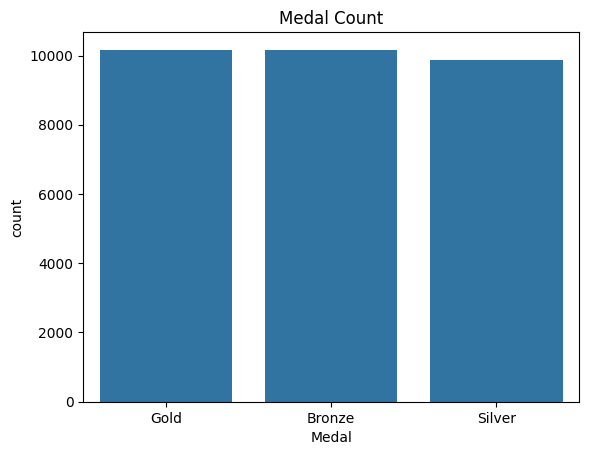

In [31]:
# Medal Count
medal_counts = df['Medal'].value_counts(dropna=False)
print(medal_counts)
sns.countplot(data=df, x='Medal', order=df['Medal'].value_counts().index)
plt.title("Medal Count")
plt.show()

Team
United States    4273
Soviet Union     2203
Germany          1518
Australia        1196
Russia           1091
Canada           1024
Great Britain    1010
Italy            1008
France            965
East Germany      935
Name: Medal, dtype: int64


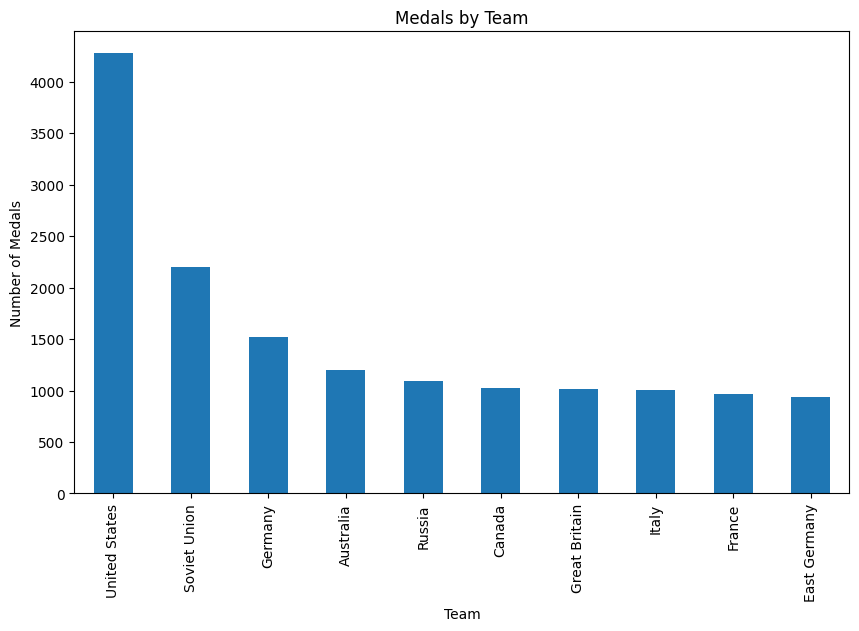

In [32]:
#  Medals Won by Country (Team)
medals_by_team = df.groupby('Team')['Medal'].count().sort_values(ascending=False).head(10)
print(medals_by_team)
medals_by_team.plot(kind='bar', title="Medals by Team", figsize=(10,6))
plt.ylabel("Number of Medals")
plt.show()

Sport
Athletics     3648
Swimming      2486
Rowing        2104
Ice Hockey    1301
Hockey        1168
Gymnastics    1161
Fencing       1109
Football      1084
Canoeing      1041
Basketball    1000
Name: Medal, dtype: int64


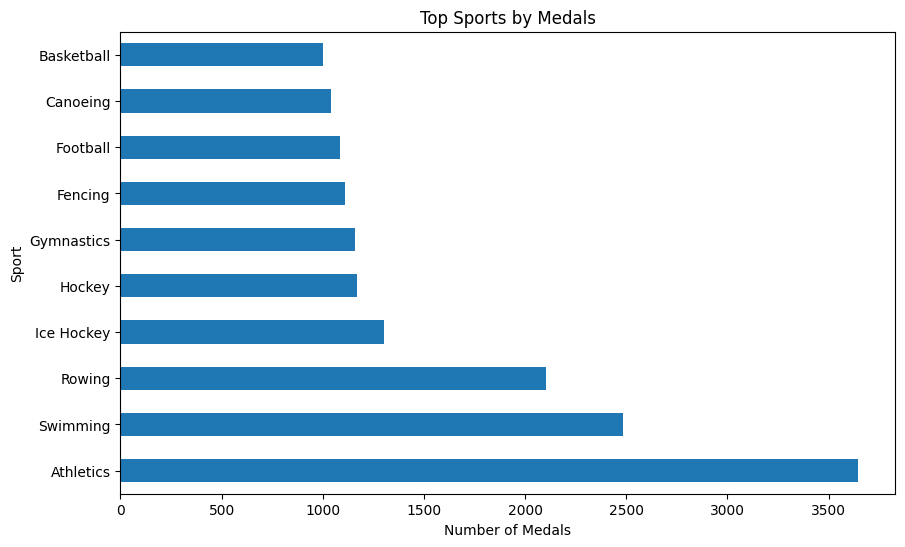

In [34]:
#Medals by Sport
medals_by_sport = df[df['Medal'].notnull()].groupby('Sport')['Medal'].count().sort_values(ascending=False).head(10)
print(medals_by_sport)
medals_by_sport.plot(kind='barh', title="Top Sports by Medals", figsize=(10,6))
plt.xlabel("Number of Medals")
plt.ylabel("Sport")
plt.show()

Sport
Equestrianism       35.315234
Golf                33.000000
Curling             32.137405
Art Competitions    32.000000
Shooting            30.201107
Sailing             30.019202
Beach Volleyball    29.617647
Bobsleigh           29.332155
Skeleton            28.958333
Triathlon           28.200000
Name: Age, dtype: float64


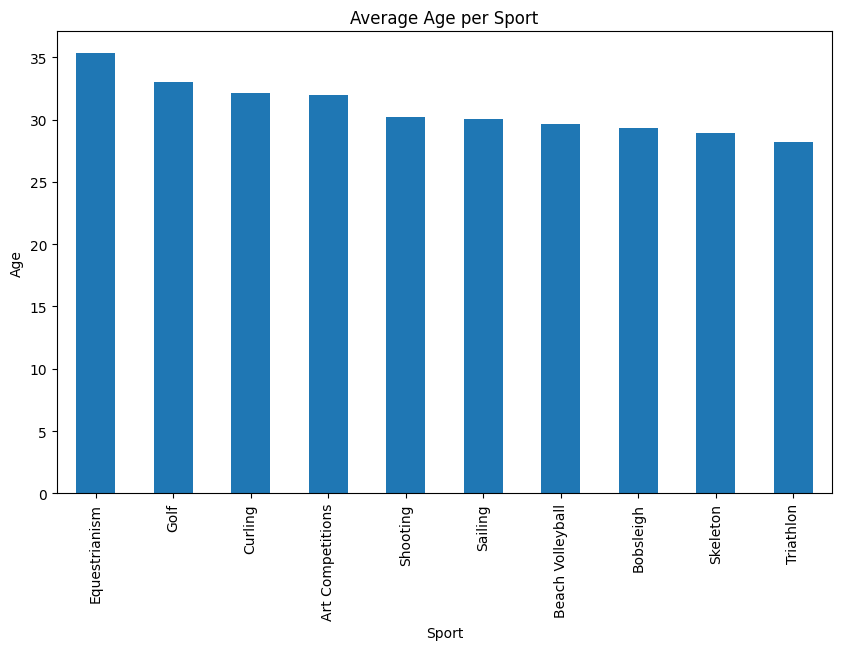

In [35]:
# Average Age by Sport
avg_age_by_sport = df.groupby('Sport')['Age'].mean().sort_values(ascending=False).head(10)
print(avg_age_by_sport)
avg_age_by_sport.plot(kind='bar', title="Average Age per Sport", figsize=(10,6))
plt.ylabel("Age")
plt.show()

                      Height     Weight
Sport                                  
Basketball        192.153000  86.692000
Volleyball        186.882046  79.600209
Beach Volleyball  186.823529  79.632353
Water Polo        185.564136  85.554974
Rowing            184.631179  80.863593
Handball          183.239061  81.157951
Baseball          182.429429  85.777778
Bobsleigh         182.208481  90.077739
Swimming          181.111022  73.258045
Tennis            180.427746  72.057803


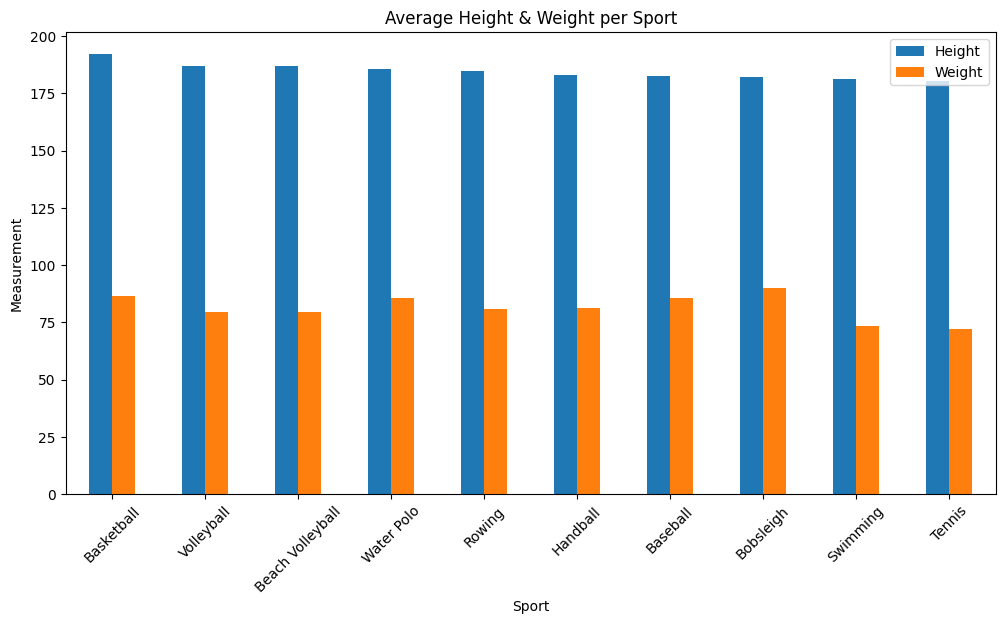

In [36]:
# Average Height/Weight by Sport
avg_height_weight = df.groupby('Sport')[['Height', 'Weight']].mean().sort_values(by='Height', ascending=False).head(10)
print(avg_height_weight)
avg_height_weight.plot(kind='bar', figsize=(12,6))
plt.title("Average Height & Weight per Sport")
plt.ylabel("Measurement")
plt.xticks(rotation=45)
plt.show()

Sex
0    19831
1    10350
Name: Medal, dtype: int64


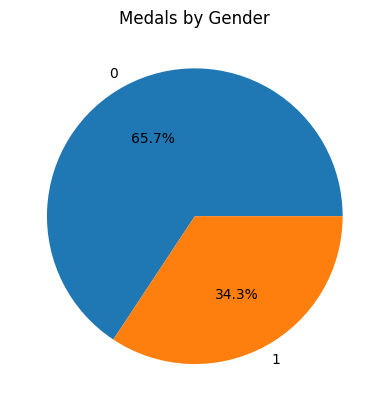

In [37]:
#Medals by Gender
gender_medals = df.groupby('Sex')['Medal'].count()
print(gender_medals)
gender_medals.plot(kind='pie', autopct='%1.1f%%', title="Medals by Gender")
plt.ylabel("")
plt.show()

In [38]:
summary = df.groupby(['Team', 'Year', 'Medal']).size().unstack(fill_value=0)
print(summary.head())

Medal             Bronze  Gold  Silver
Team        Year                      
Afghanistan 2008       1     0       0
            2012       1     0       0
Algeria     1992       1     1       0
            1996       1     2       0
            2000       3     1       1


In [39]:
#Total Medals by Country and Year
medals_by_country_year = df.groupby(['Team', 'Year'])['Medal'].count().reset_index(name='MedalCount')
print(medals_by_country_year.sort_values(by='MedalCount', ascending=False).head(10))

               Team  Year  MedalCount
1274   Soviet Union  1980         478
1484  United States  1984         359
1276   Soviet Union  1988         352
1273   Soviet Union  1976         324
1494  United States  2008         308
408    East Germany  1980         282
1492  United States  2004         258
1498  United States  2016         255
1272   Soviet Union  1972         249
1488  United States  1996         240


In [40]:
#Medal Count by Team and Sport
medals_by_team_sport = df[df['Medal'].notnull()].groupby(['Team', 'Sport'])['Medal'].count()
print(medals_by_team_sport.sort_values(ascending=False).head(10))

Team           Sport     
United States  Athletics     1004
               Swimming       917
Australia      Swimming       349
United States  Basketball     341
Canada         Ice Hockey     281
United States  Rowing         265
Great Britain  Athletics      254
Soviet Union   Athletics      238
United States  Ice Hockey     236
Soviet Union   Gymnastics     233
Name: Medal, dtype: int64


In [41]:
#Medals by Gender and Year
medals_by_gender_year = df.groupby(['Sex', 'Year'])['Medal'].count().unstack(fill_value=0)
print(medals_by_gender_year.head())

Year  1896  1900  1904  1906  1908  1912  1920  1924  1928  1932  ...  1998  \
Sex                                                               ...         
0       20    38    59    69   134   130   181   181   150   151  ...   250   
1        0     0     0     0     0     0     1     4    20    25  ...   187   

Year  2000  2002  2004  2006  2008  2010  2012  2014  2016  
Sex                                                         
0     1116   270  1103   295  1111   287  1014   320  1047  
1      877   207   897   231   924   228   901   250   967  

[2 rows x 35 columns]


In [42]:
# Top Athletes with Most Medals
top_athletes = df.groupby('Name')['Medal'].count().sort_values(ascending=False).head(10)
print(top_athletes)

Name
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Borys Anfiyanovych Shakhlin           13
Ole Einar Bjrndalen                   13
Takashi Ono                           13
Paavo Johannes Nurmi                  12
Natalie Anne Coughlin (-Hall)         12
Ryan Steven Lochte                    12
Birgit Fischer-Schmidt                12
Name: Medal, dtype: int64


In [43]:
#Number of Athletes per Team per Year
athletes_per_team_year = df.groupby(['Team', 'Year'])['Name'].nunique().unstack(fill_value=0)
print(athletes_per_team_year.head())

Year                          1896  1900  1904  1906  1908  1912  1920  1924  \
Team                                                                           
Afghanistan                      0     0     0     0     0     0     0     0   
Algeria                          0     0     0     0     0     0     0     0   
Amateur Athletic Association     0     2     0     0     0     0     0     0   
Aphrodite                        0     0     0     0     0     0     0     0   
Argentina                        0     0     0     0     0     0     0     2   

Year                          1928  1932  ...  1998  2000  2002  2004  2006  \
Team                                      ...                                 
Afghanistan                      0     0  ...     0     0     0     0     0   
Algeria                          0     0  ...     0     5     0     0     0   
Amateur Athletic Association     0     0  ...     0     0     0     0     0   
Aphrodite                        0     0  ..

In [44]:
# Average Age of Athletes by Sport and Gender
avg_age_by_sport_gender = df.groupby(['Sport', 'Sex'])['Age'].mean().sort_values(ascending=False).head(10)
print(avg_age_by_sport_gender)

Sport             Sex
Golf              0      39.000000
Equestrianism     0      35.859873
                  1      33.979167
Curling           1      32.636364
Art Competitions  0      32.000000
Curling           0      31.630769
Shooting          0      30.964736
Skeleton          0      30.750000
Sailing           0      30.722826
Beach Volleyball  0      29.636364
Name: Age, dtype: float64


In [45]:
#Average Height and Weight by Sport and Gender
avg_stats_by_sport_gender = df.groupby(['Sport', 'Sex'])[['Height', 'Weight']].mean().sort_values(by='Height', ascending=False)
print(avg_stats_by_sport_gender.head(10))

                          Height     Weight
Sport            Sex                       
Basketball       0    197.996721  94.993443
Beach Volleyball 0    194.000000  90.878788
Volleyball       0    193.940695  88.218814
Golf             0    190.500000  86.000000
Handball         0    190.348837  91.536822
Water Polo       0    188.801047  90.225131
Rowing           0    188.181232  85.469914
Swimming         0    187.158453  81.376422
Tennis           0    185.865169  80.123596
Taekwondo        0    185.333333  75.972222


Season
Summer    17762
Winter     2983
Name: Name, dtype: int64


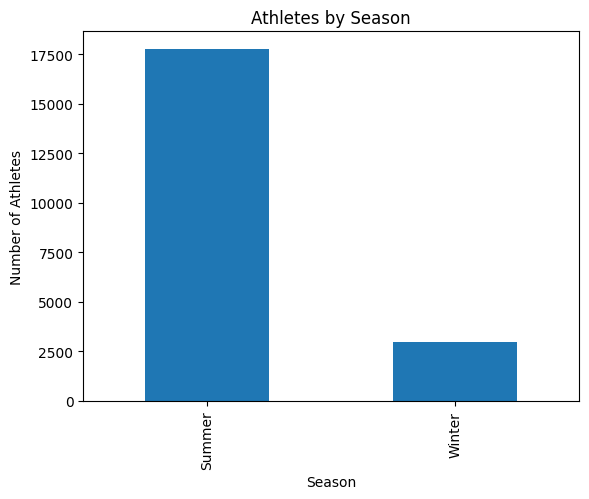

In [46]:
#Athlete Count by Season (Summer/Winter)
athlete_count_by_season = df.groupby('Season')['Name'].nunique()
print(athlete_count_by_season)
athlete_count_by_season.plot(kind='bar', title="Athletes by Season")
plt.ylabel("Number of Athletes")
plt.show()

In [47]:
#Medal Types by Country (Gold/Silver/Bronze)
medal_types_by_country = df.groupby(['Team', 'Medal'])['Name'].count().unstack(fill_value=0)
print(medal_types_by_country.sort_values(by='Gold', ascending=False).head(10))

Medal          Bronze  Gold  Silver
Team                               
United States     938  2075    1260
Soviet Union      613   961     629
Germany           540   508     470
East Germany      261   368     306
Russia            392   356     343
Canada            338   350     336
Great Britain     346   321     343
Australia         471   313     412
China             266   308     323
Italy             366   302     340


In [48]:
#Top 10 Countries with Highest Medal-to-Participation Ratio
# Total participants per country
total_participants = df.groupby('Team')['Name'].nunique()

# Total medals per country
total_medals = df.groupby('Team')['Medal'].count()

# Combine and calculate ratio
medal_ratio = pd.DataFrame({'Participants': total_participants, 'Medals': total_medals})
medal_ratio['Ratio'] = medal_ratio['Medals'] / medal_ratio['Participants']

# Top 10
top_countries_ratio = medal_ratio.sort_values(by='Ratio', ascending=False).head(10)
print(top_countries_ratio)

               Participants  Medals  Ratio
Team                                      
Namibia                   1       4    4.0
Afghanistan               1       2    2.0
Mozambique                1       2    2.0
Ecuador                   1       2    2.0
Costa Rica                2       4    2.0
Suriname                  1       2    2.0
Liechtenstein             4       8    2.0
Grenada                   1       2    2.0
Australia-1               2       4    2.0
Kuwait                    1       2    2.0


In [49]:
#Athletes Who Won Multiple Medals in Same Event
multi_medal_athletes = df.groupby(['Name', 'Event', 'Sport'])['Medal'].count()
multi_medal_athletes = multi_medal_athletes[multi_medal_athletes > 1]
print(multi_medal_athletes.sort_values(ascending=False).head(10))

Name                                  Event                                            Sport        
Aladr Gerevich (-Gerei)               Fencing Men's Sabre, Team                        Fencing          6
Armin Zggeler                         Luge Men's Singles                               Luge             6
Hans Gnter Winkler                    Equestrianism Mixed Jumping, Team                Equestrianism    6
Isabelle Regina Werth                 Equestrianism Mixed Dressage, Individual         Equestrianism    5
Dara Grace Torres (-Hoffman, -Minas)  Swimming Women's 4 x 100 metres Freestyle Relay  Swimming         5
Isabelle Regina Werth                 Equestrianism Mixed Dressage, Team               Equestrianism    5
Reiner Klimke                         Equestrianism Mixed Dressage, Team               Equestrianism    5
Ricco Gro                             Biathlon Men's 4 x 7.5 kilometres Relay          Biathlon         5
Eskild Balschmidt Ebbesen             Rowing Men's 

Event
Ice Hockey Men's Ice Hockey      1001
Football Men's Football           783
Hockey Men's Hockey               714
Basketball Men's Basketball       610
Water Polo Men's Water Polo       573
Handball Men's Handball           516
Volleyball Men's Volleyball       489
Volleyball Women's Volleyball     469
Hockey Women's Hockey             454
Rowing Men's Coxed Eights         446
Name: Name, dtype: int64


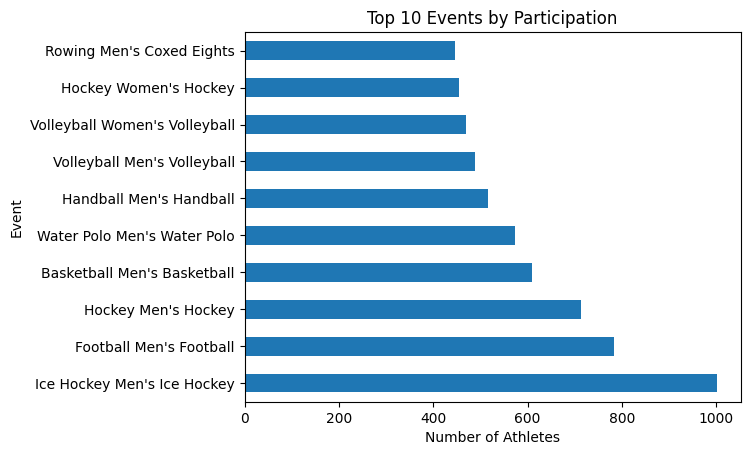

In [50]:
# Most Popular Events by Participation
event_popularity = df.groupby('Event')['Name'].count().sort_values(ascending=False).head(10)
print(event_popularity)
event_popularity.plot(kind='barh', title="Top 10 Events by Participation")
plt.xlabel("Number of Athletes")
plt.ylabel("Event")
plt.show()


In [18]:
# # 1. تحضير البيانات للتصنيف
# # إنشاء العمود المستهدف: WonMedal
# data['WonMedal'] = data['Medal'].notnull().astype(int)  # 1 = فاز، 0 = لم يفز

In [19]:
# # اختيار المتغيرات المدخلة (Features):
# features = ['Age', 'Height', 'Weight', 'Sex']
# X = df[features]
# y = df['WonMedal']